# Clustering with kmeans


by Matt Marwedel  
  
## Import libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.cluster import KMeans #for runtime testing only

from PIL import Image
from IPython.display import display

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

## Table of Contents

- kmeans
- Testing kmeans
- kmeans++
- Testing kmeans++
- Image Compression Application
- Hierarchical Clustering

## kmeans

Clustering is the process of grouping data together in such a way that datapoints in the same group are more similar to each other than datapoints in other groups. The most common clustering algorithm in data science is kmeans. An understanding of this algorithm and its application is essential for any data scientist.  
  
Here are the steps of the kmeans algorithm and its python implementation.  

__kmeans__  
1. Choose the number of clusters (k). Create k cluster centroids at random for the data.
2. For each datapoint, assign it to the nearest cluster centroid. Do this by finding the distance between the datapoint and all centroids, then selecting the centroid with least distance.
3. Recompute the centroids as the mean of all data points in the cluster.
4. Repeat steps 2-3 until the centroids don't change or change very minimally at the recompute step.

__Python kmeans function__

In [89]:
def kmeans(X:np.ndarray, k:int, centroids=None, max_iter=30, tolerance=1e-2):
    #Step 1
    if centroids == None:
        centroids = X[np.random.choice(range(len(X)), k, replace=True)]
    #Step 2
    for iter in range(max_iter):
        distances = np.sqrt(((X-centroids[:,np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        #Step 3
        updated_centroids = np.zeros(centroids.shape)
        for centroid_index in range(k):
            updated_centroids[centroid_index] = np.mean(X[labels == centroid_index], axis=0)
        #Step 4
        if np.allclose(centroids, updated_centroids, rtol=0, atol=tolerance):
            break

        centroids = updated_centroids

    return centroids, labels

## Testing kmeans

The algorithm can be tested on 500 random 2D data points with x and y values ranging from 0 to 100. Please reference the following before and after kmeans clustering graphs created from the kmeans algorithm with 5 clusters and the default tolerance and max iterations values.

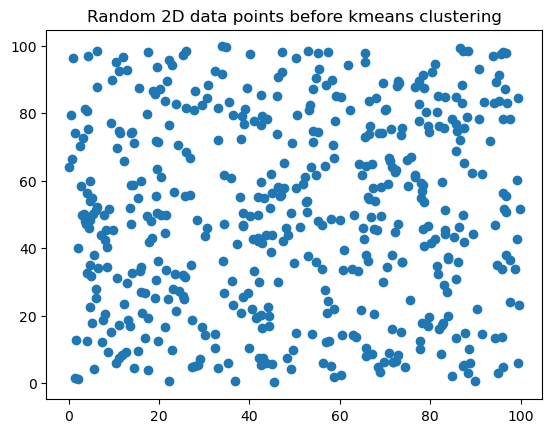

In [90]:
x = np.random.rand (500, 2)
X= x*100
plt.scatter(X[:,0],X[:,1])
plt.title('Random 2D data points before kmeans clustering')
plt.show()

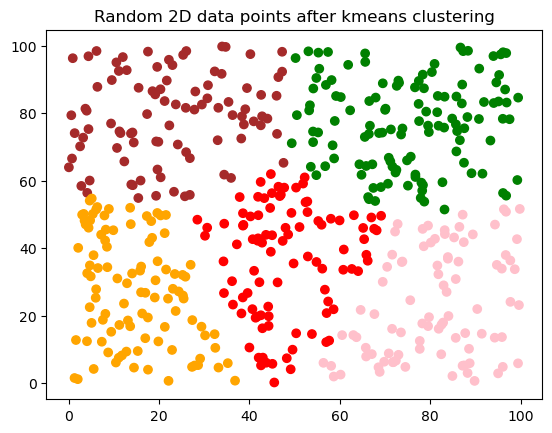

In [91]:
centroids1, labels1 = kmeans(X,5) #Performing kmeans clustering on the data
colors = np.array(['red', 'green', 'orange', 'pink', 'brown'])
plt.scatter(X[:,0],X[:,1], c=colors[labels1])
plt.title('Random 2D data points after kmeans clustering')
plt.show()

The run time of the kmeans algorithm can tested against sci-kit learn's kmeans algorithm. Another 500 random 2D data points with x and y values ranging from 0 to 100 will be created to test the kmeans algorithm against sci-kit learn kmeans algorithm. Both will use 5 clusters and 30 max iterations.

In [92]:
test = np.random.rand (500, 2)
Test= test*100
start_time = time()
c, l = centroids1, labels1 = kmeans(Test,5)
end_time = time()
run_time = end_time - start_time
print('Run time of kmeans algorithm:',run_time,'seconds')
start_time = time()
sc = KMeans(n_clusters=5,max_iter=30).fit_predict(Test)
end_time = time()
run_time = end_time - start_time
print('Run time of sci-kit learn kmeans algorithm:',run_time,'seconds')

Run time of kmeans algorithm: 0.002553701400756836 seconds
Run time of sci-kit learn kmeans algorithm: 0.03137016296386719 seconds


## kmeans++
One limitation of kmeans is that the initial centroids are created randomly, so it's possible to end up selecting random points that are too close together, resulting in uneven clusters. To avoid this limitation, the kmeans++ centroid identification can be used.

Here are the steps of the kmeans++ centroid identification algorithm and its python implementation. The kmeans algorithm from earlier will also be updated to allow optional kmeans++ centroid identification.

__kmeans++__  
1. Pick a random data point as the first point for creating k clusters.
2. Pick the next k-1 cluster points by selecting data points that maximize the minimum distance to all created clusters. For each point, compute the distance to each created cluster and find the minimum. From the group of minumim distances for each point, find the maximum distance. The point associated with that maximum minimum distance is the next cluster. Continue making clusters this way until there are k clusters.


In [93]:
def select_centroids(X,k):
    #Step 1
    centroids = []
    centroids.append(np.random.choice(range(X.shape[0])))
    #Step 2
    for centroid in range(1,k):
        created = np.ones_like(X, dtype=bool)
        created[centroids, :] = False
        x = X[created].reshape(-1, X.shape[1])
        distances = np.zeros(x.shape[0])
        for point in range(x.shape[0]):
            distances[point] = np.min([np.linalg.norm(x[point] - c) for c in centroids])
        centroids.append(np.argmax(distances))
    return X[centroids]

In [94]:
def kmeans(X:np.ndarray, k:int, centroids=None, max_iter=30, tolerance=1e-2):
    #Step 1
    if centroids == None:
        centroids = X[np.random.choice(range(len(X)), k, replace=True)]
    #Updating for kmeans++
    if centroids == 'kmeans++':
        centroids = select_centroids(X,k)
    #Step 2
    for iter in range(max_iter):
        distances = np.sqrt(((X-centroids[:,np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        #Step 3
        updated_centroids = np.zeros(centroids.shape)
        for centroid_index in range(k):
            updated_centroids[centroid_index] = np.mean(X[labels == centroid_index], axis=0)
        #Step 4
        if np.allclose(centroids, updated_centroids, rtol=0, atol=tolerance):
            break

        centroids = updated_centroids

    return centroids, labels

## Testing kmeans++  
The kmeans++ centroid identification can be tested on another random 500 2D data points similar as before. Runtime can also be tested against ski-kit learn as before.

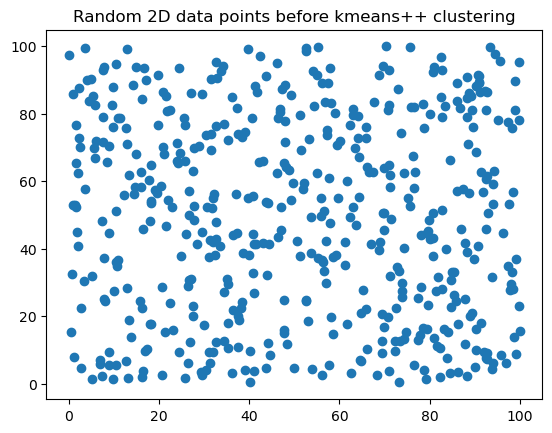

In [95]:
x = np.random.rand (500, 2)
X= x*100
plt.scatter(X[:,0],X[:,1])
plt.title('Random 2D data points before kmeans++ clustering')
plt.show()

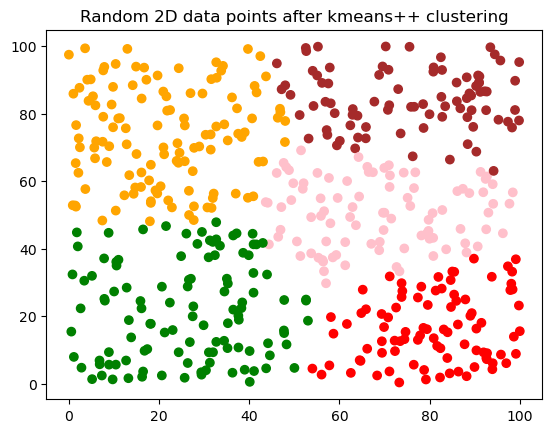

In [96]:
centroids2, labels2 = kmeans(X,5, centroids='kmeans++') #Performing kmeans++ clustering on the data
colors = np.array(['red', 'green', 'orange', 'pink', 'brown'])
plt.scatter(X[:,0],X[:,1], c=colors[labels2])
plt.title('Random 2D data points after kmeans++ clustering')
plt.show()

In [97]:
test2 = np.random.rand (500, 2)
Test2= test2*100
start_time = time()
c, l = kmeans(Test2,5,centroids='kmeans++')
end_time = time()
run_time = end_time - start_time
print('Run time of kmeans++ algorithm:',run_time,'seconds')
start_time = time()
sc = KMeans(n_clusters=5,max_iter=30).fit_predict(Test2)
end_time = time()
run_time = end_time - start_time
print('Run time of sci-kit learn kmeans algorithm:',run_time,'seconds')

Run time of kmeans++ algorithm: 0.03376603126525879 seconds
Run time of sci-kit learn kmeans algorithm: 0.026100873947143555 seconds


## Image Compresssion Application  
A common implemtation of kmeans clustering is in compressing images from millions of colors to 256 or 64 colors to improve storage. The kmeans clustering algorithm has been implemented on an image (owned and created by the author of this report) below:

Original Image


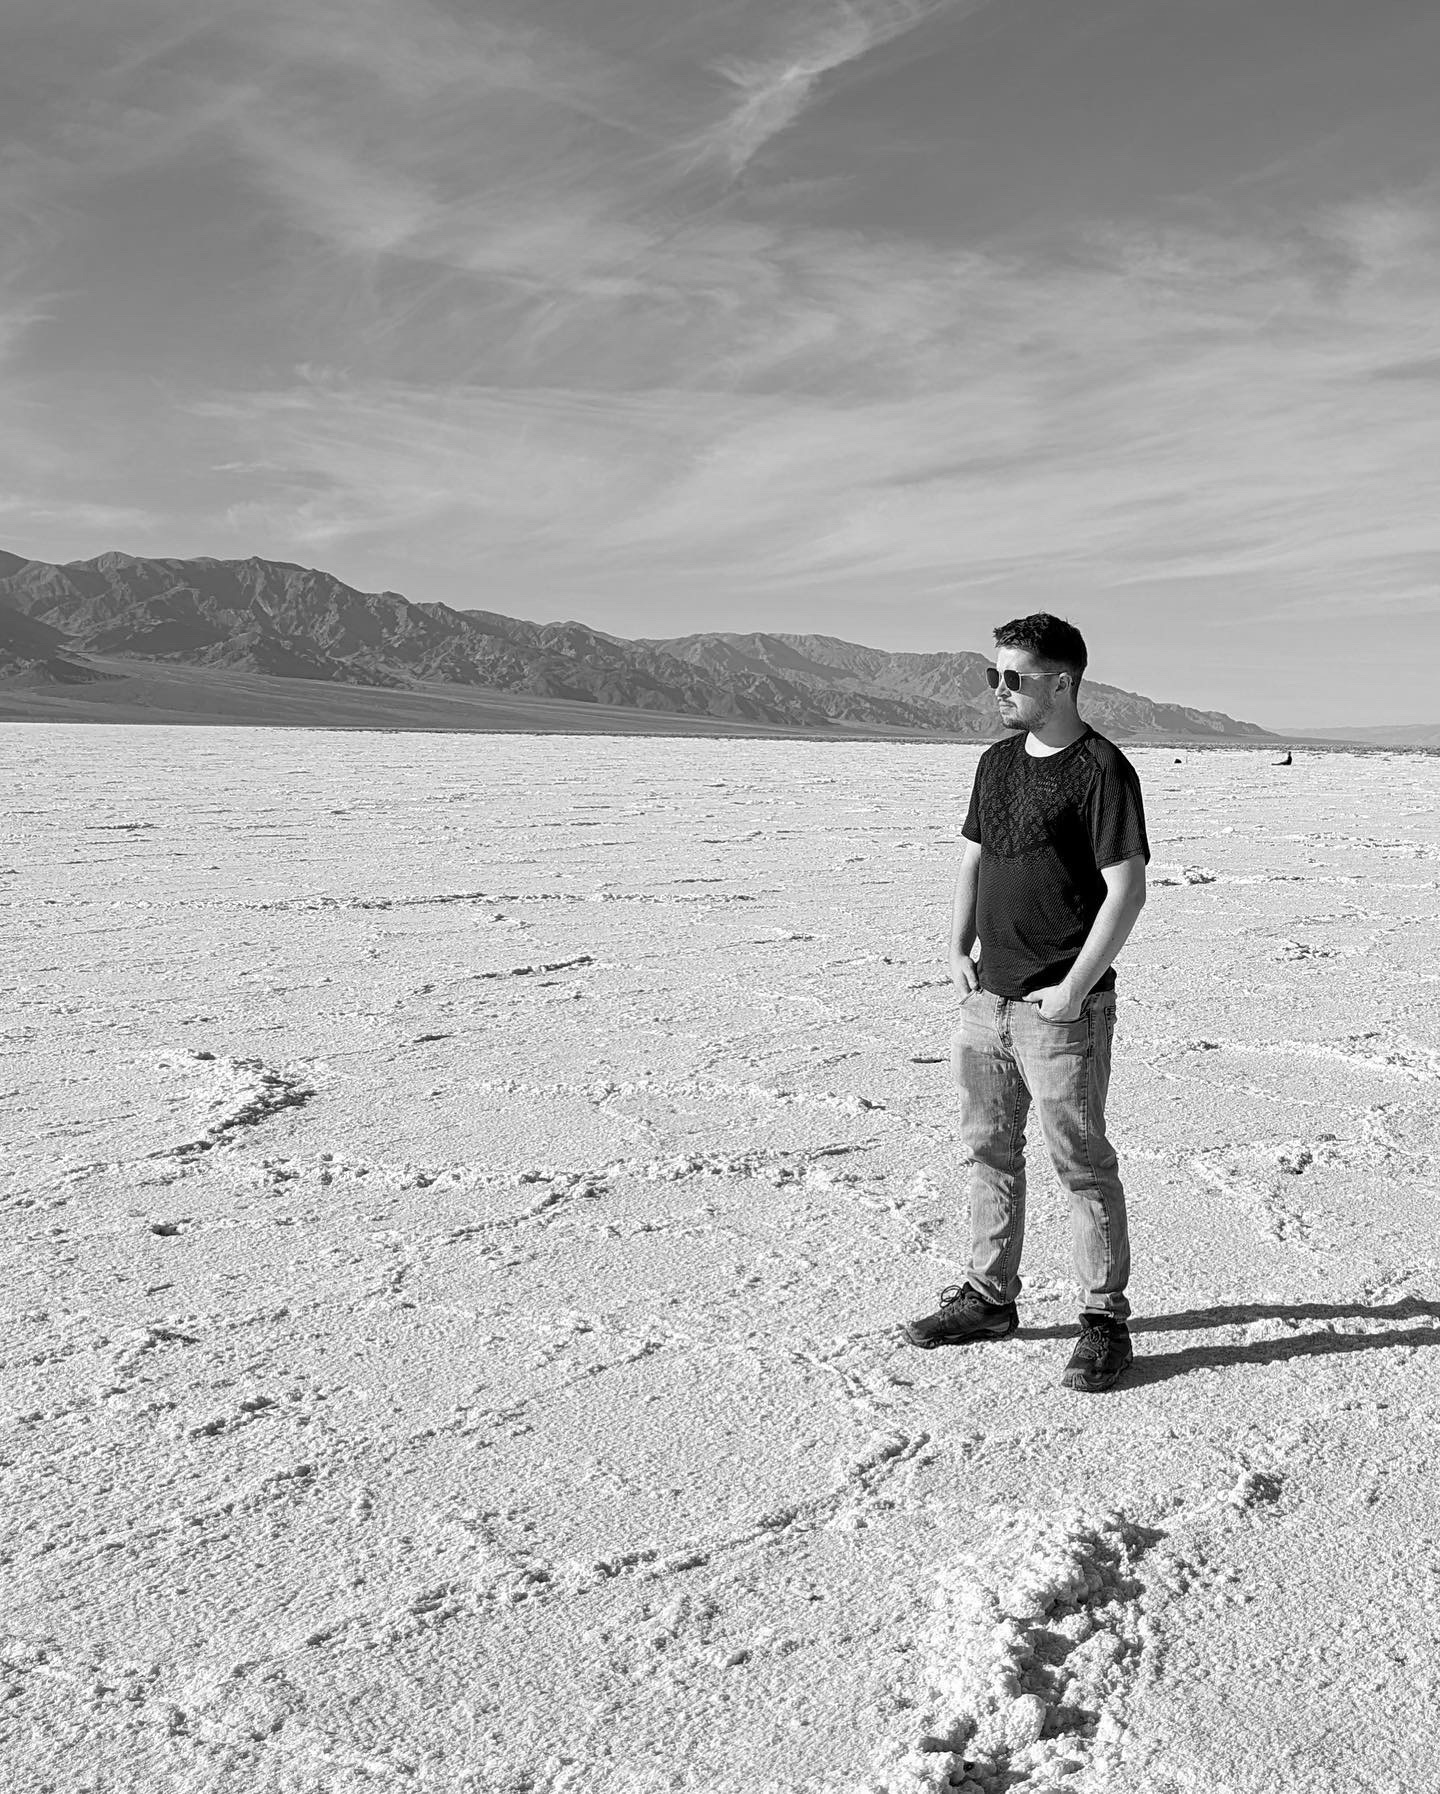

Compressed Image with 32 kmeans Clusters


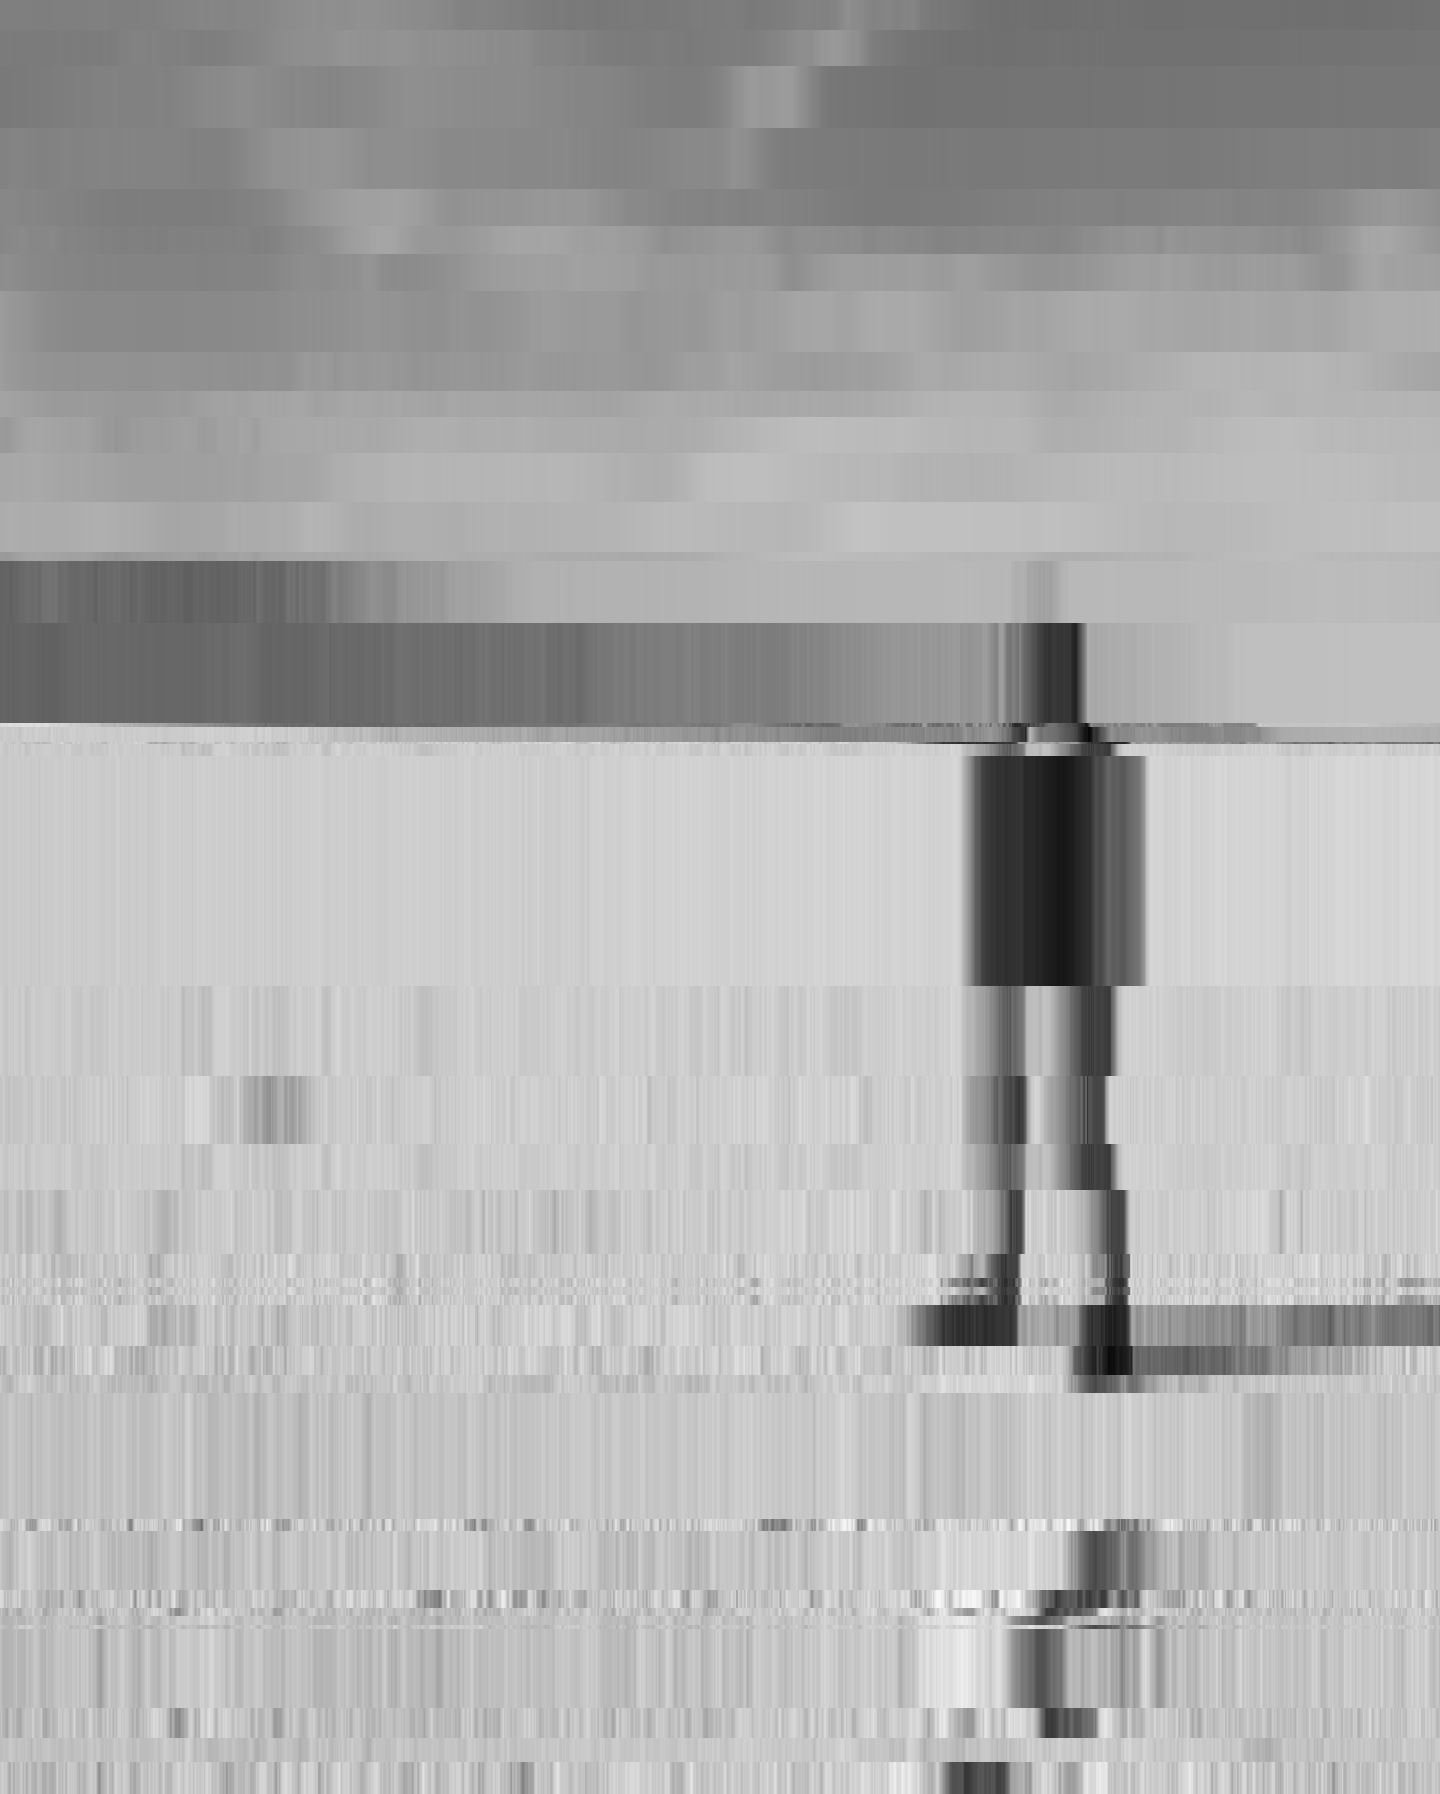

In [100]:
img1 = Image.open('Grey_me.jpg').convert('L')
print('Original Image')
display(img1) #display the original image

array1 = np.array(img1) #create an array from the image
i1c, i1l = kmeans(array1, 32) #apply kmeans with 32 clusters to the array
i1c = i1c.astype(np.uint8)
compressed_array = i1c[i1l] #reassign points in the array

compressed_img1 = Image.fromarray(compressed_array,'L') #make a compressed image from the array

print("Compressed Image with 32 kmeans Clusters")
display(compressed_img1) #display the compressed image

## Hierarchical Clustering 
Hierarchical clustering creates a hierarchy of clusters, which allows important relationships between various clusters to be more apparent. The best way to describe hierarchical clustering is by imagining a tree as the cluster groups. The leaves on the tree represent the bottom of the hierarchy with all data points in their own clusters. Smaller branches represent the hierarchy of the data points in the leaves clusters being combined into larger branch clusters. Branches on the tree continue to combine and clusters are merged as the hierarchy is climbed until the trunk is reached. At this point all data points are in the same cluster. An example hierarchical clustering on 20 random 2D data points is shown below using the scipy library.

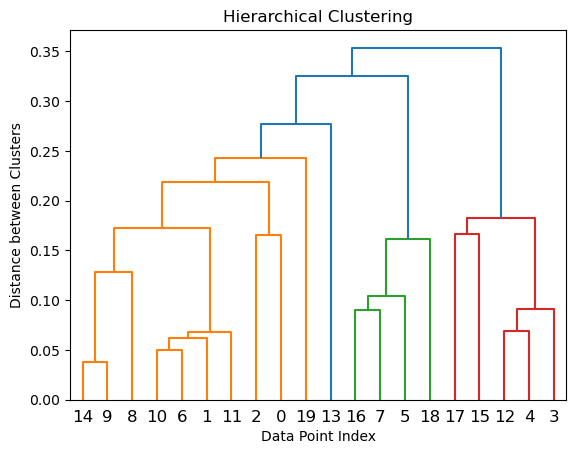

In [99]:
X = np.random.rand (20, 2)
linked = linkage(X, 'single')
dendrogram(linked,
            orientation='top',
            labels=None,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Hierarchical Clustering")
plt.xlabel("Data Point Index")
plt.ylabel("Distance between Clusters")
plt.show()

Here are the steps for the hierarchical clustering (using the more popular agglomerative or bottom-up approach):
1. Each data point is in a separate cluster
2. Compute the distance between all pair of clusters
3. Find the closest pair of clusters.
4. Merge the closest pair into a new cluster.
5. Repeats steps 2-4 until all clusters are merged.